In [1]:
import uproot 
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import cygno as cy
from scipy.optimize import curve_fit

Matplotlib is building the font cache; this may take a moment.


In [2]:
df_logbook = cy.read_cygno_logbook(verbose=False)

In [3]:
df_logbook

,run_number,run_description,start_time,exposure_sec,GEM3_V,GEM2_V,GEM1_V,T2_V,T1_V,DRIFT_V,...,shielding_configuration,stop_time,number_of_events,storage_local_status,storage_cloud_status,storage_tape_status,file_size,file_checksum,file_s3_tag,online_reco_status
0,21,test,2022-03-21 15:17:13,1.0,0,0,0,20,20,240,...,NaN,2022-03-21 15:17:26,8.0,-1,-1,-1,-1,None,None,-1
1,34,test,2022-03-22 17:01:30,1.0,0,0,0,20,20,240,...,NaN,NaT,NaN,-1,-1,-1,-1,None,None,-1
2,35,test,2022-03-22 17:02:12,1.0,0,0,0,20,20,240,...,NaN,2022-03-22 17:02:19,0.0,-1,-1,-1,-1,None,None,-1
3,36,test,2022-03-22 17:03:26,1.0,0,0,0,20,20,240,...,NaN,2022-03-22 17:03:43,10.0,-1,-1,-1,-1,None,None,-1
4,37,test,2022-03-22 17:08:02,1.0,0,0,0,20,20,240,...,NaN,2022-03-22 17:08:21,12.0,-1,-1,-1,-1,None,None,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19968,25672,Stability - Line 1,2023-09-28 15:38:09,0.3,440,440,440,500,500,960,...,2.0,2023-09-28 15:42:07,405.0,1,1,1,1534158952,b1c3ba37c085fdf669da88aa71e2c46f,LNGS,1
19969,25673,Stability - Line 1,2023-09-28 16:33:03,0.3,440,440,440,500,500,960,...,2.0,2023-09-28 16:34:02,101.0,1,-1,-1,381984804,25762c1988786cdeb64dd5502754d33e,None,-1
19970,25674,Stability - Line 1,2023-09-28 16:35:48,0.3,440,440,440,500,500,960,...,2.0,2023-09-28 16:39:44,402.0,1,-1,-1,1516495735,80b3b5cc0a52f2d67092ecda66b48dd1,None,-1
19971,25675,Stability - Line 1,2023-09-28 17:30:40,0.3,440,440,440,500,500,960,...,2.0,2023-09-28 17:31:39,101.0,0,-1,-1,-1,None,None,-1


In [4]:
dt = []
[dt.append(int(round(df_logbook['stop_time'][i].timestamp())) - int(round(df_logbook['start_time'][i].timestamp()))) for i in range(19721,19725)]
filesize_arr = []
[filesize_arr.append(df_logbook['file_size'][i]) for i in range(19721,19725)]
x = np.array([i for i in range(19721,19725)])
print(dt, x, filesize_arr)

[237, 236, 237, 237] [19721 19722 19723 19724] [1534123990, 1533918150, 1533950482, 1534002652]


(array([19720.5, 19721. , 19721.5, 19722. , 19722.5, 19723. , 19723.5,
        19724. , 19724.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

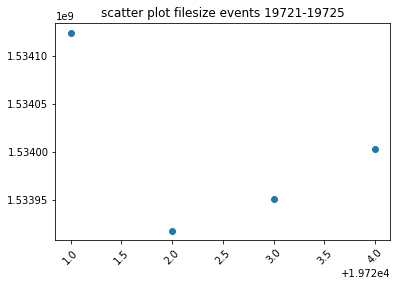

In [5]:
plt.scatter(x,filesize_arr)
plt.title('scatter plot filesize events 19721-19725')
plt.xticks(rotation=45)


Text(0, 0.5, 'sec')

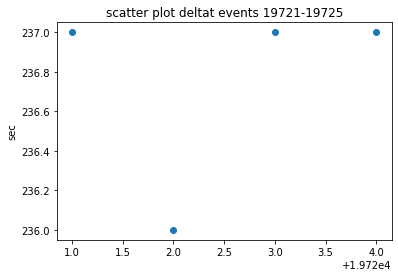

In [6]:
plt.scatter(x,dt)
plt.title('scatter plot deltat events 19721-19725')
plt.ylabel('sec')